In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

,Name,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,circuit_4,80209,80209,0.099494,1000,3.835031,307604,71.507509,6.183347,416,8
1,ex11,16614,16614,0.152645,1000,66.025521,1096948,145.081661,14.377510,416,8
2,neos,479119,515905,0.411257,1000,3.186670,1526794,128.747385,10.834727,416,8
3,Hamrle3,1447360,1447360,2.289573,1000,3.809862,5514242,55.754143,4.816831,416,8
4,hugebubbles,21198119,21198119,44.605801,1000,2.999340,63580358,34.480080,2.873235,416,8
5,ljournal,5363260,5363260,19.499347,1000,14.734162,79023142,84.352671,8.105209,416,8
6,cage15,5154859,5154859,11.627998,1000,19.243892,99199551,175.941665,17.062189,416,8
7,com,3072441,3072441,96.623460,1000,76.281421,234370166,49.288798,4.890413,416,8
8,uk,18520486,18520486,22.690836,1000,16.096433,298113762,320.745192,30.921895,416,8


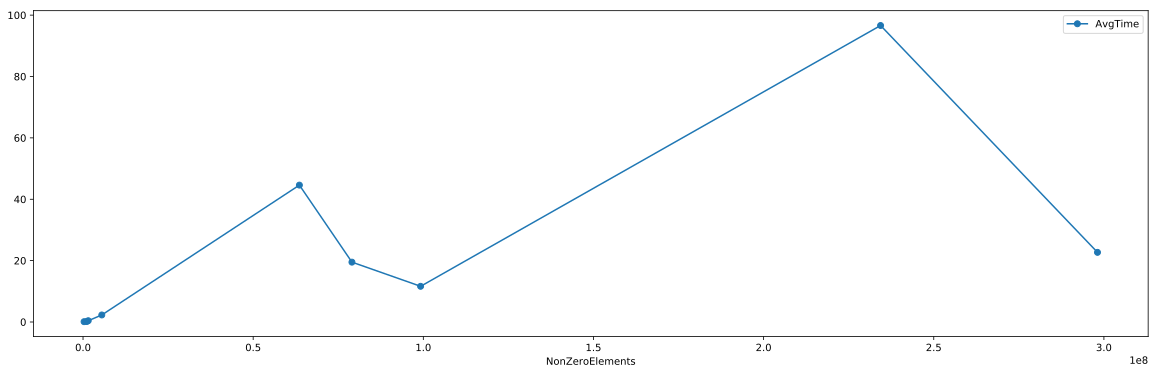

In [31]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_SpMV_Performance_on_GPU.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data.groupby('Name').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
ax = data.plot(kind="line", marker='o', x="NonZeroElements", y="AvgTime", figsize=(20,6))
# pdf.savefig(bbox_inches = 'tight')
pdf.close()
data